In [1]:
import sys
sys.path.append('../')

from measure.tasks import narmax, santa_fe
import numpy as np
import pandas as pd
from plotnine import *
from plotnine import options

In [2]:
w = 14
h = 4
options.figure_size = (w,h)

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 14 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: narma_bg.pdf


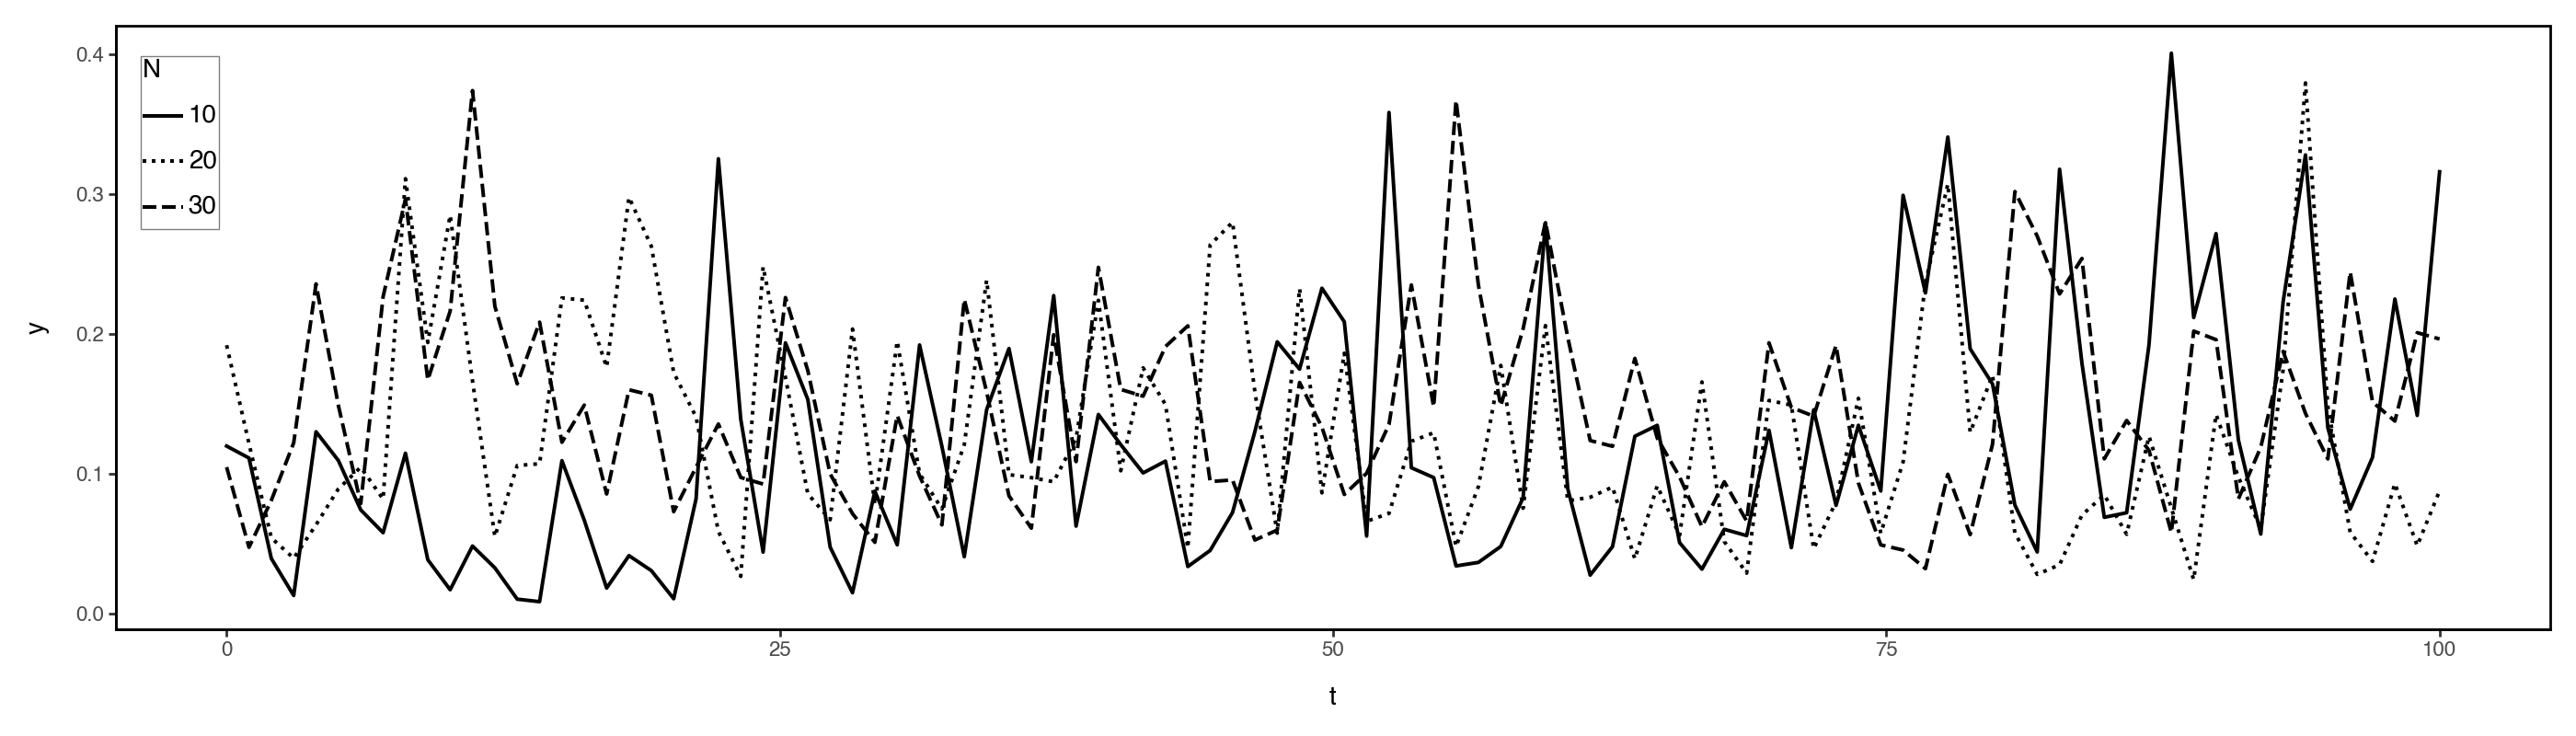

In [4]:
_, narma10 = narmax(order=10)
_, narma20 = narmax(order=20)
_, narma30 = narmax(order=30)

narma10 = narma10.squeeze()[:100]
narma20 = narma20.squeeze()[:100]
narma30 = narma30.squeeze()[:100]

x = np.linspace(0, narma10.shape[0], narma10.shape[0])

df = pd.DataFrame({
    'x': np.tile(x, 3),
    'Value': np.concatenate([narma10, narma20, narma30]),
    'N': np.repeat(["10", "20", "30"], len(narma10))
})

custom_theme = theme(
    plot_title=element_text(size=14, weight="bold"),  
    axis_title_x=element_text(size=10),  
    axis_title_y=element_text(size=10),  
    axis_text_x=element_text(size=8),  
    axis_text_y=element_text(size=8),  

    panel_border=element_rect(fill=None, color="black"),
    
    legend_title=element_text(size=10, weight="bold"),  
    legend_text=element_text(size=10),  
    legend_background=element_rect(fill="white", color="black", alpha=0.5, size=0.5),
    
    legend_position=(0.01, 0.95),  
    legend_justification=(0, 1),     
)

palette = {"10": "black", "20": "black", "30": "black"}
linetype_mapping = {"10": "-", "20": ":", "30": "--"}

plot = (
    ggplot(df) 
    + geom_line(aes(x="x", y="Value", color="N", linetype="N"), size=0.8)
    + scale_color_manual(values=palette)
    + scale_linetype_manual(values=linetype_mapping) 
    + labs(x="t", y="y")
    + theme_classic()
    + custom_theme
)

plot.save("narma_bg.pdf", width=w, height=h, dpi=1000, bbox_inches='tight')

plot

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 14 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: santafe_bg.pdf


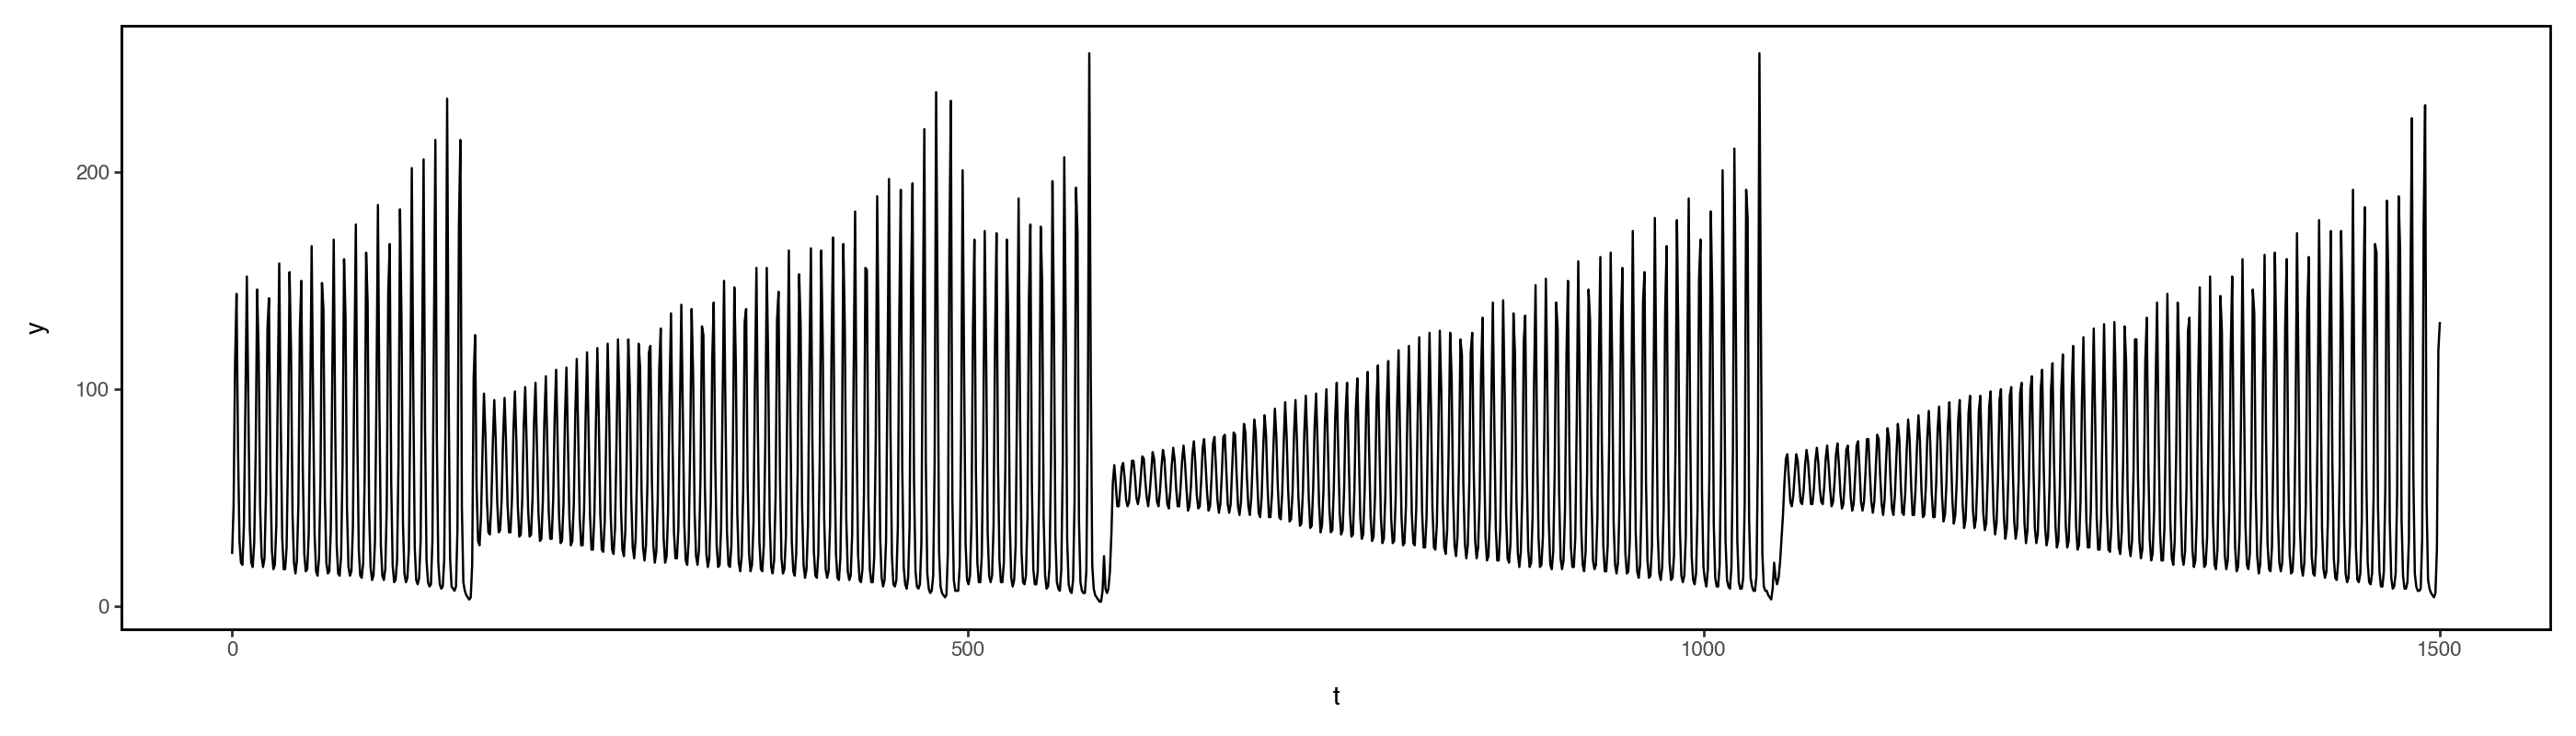

In [13]:
_, santafe = santa_fe()

santafe = santafe.squeeze()[:1500]

x = np.linspace(0, santafe.shape[0], santafe.shape[0])

df = pd.DataFrame({
    'x': x,
    'Value': santafe
})

plot = (
    ggplot(df, aes(x='x', y='Value')) +
    geom_line() +
    labs(x="t", y="y") +
    theme_classic() +
    custom_theme
)

plot.save("santafe_bg.pdf", width=w, height=h, dpi=1000, bbox_inches='tight')

plot